# Modeling a tennis game as a Stochastic simulation

This notebook explores the possibility of modeling a tennis game as a stochastic simulation.

I will use the [point-to-point dataset](https://github.com/ADLNext/tennis/tree/master/data/pointbypoint) explored [here](https://github.com/ADLNext/tennis/blob/master/tennis_p2p.ipynb) to estimate probability distributions.

For this proof of concept I am ignoring information about surface/tournament/round.

## Step 1: gathering data about a certain player

I will try to model Nadal and Djokovic and then simulate a match between them. First thing first, I need to collect data about them.

In [1]:
import pandas as pd

In [2]:
data_dir = 'data/pointbypoint/'
tournaments = [
    '2017-ausopen',
    '2016-wimbledon',
    '2016-usopen',
    '2016-frenchopen',
    '2016-ausopen',
    '2015-wimbledon',
    '2015-usopen',
    '2015-frenchopen',
    '2015-ausopen',
    '2014-wimbledon',
    '2014-usopen',
    '2014-frenchopen',
    '2014-ausopen'
]

df_points = pd.concat([
    pd.read_csv(data_dir + tournament + '-points.csv') for tournament in tournaments
], axis = 0)

df_points.head()

,ElapsedTime,GameNo,GameWinner,History,P1Ace,P1BreakPoint,P1BreakPointMissed,P1BreakPointWon,P1DistanceRun,P1DoubleFault,...,ServingTo,SetNo,SetWinner,Speed_KMH,Speed_MPH,WinnerShotType,WinnerType,Winner_BH,Winner_FH,match_id
0,0:00:00,1.0,0,NaN,0,0,0,0,0.000,0,...,NaN,1.0,0,0.0,0.0,0,0,NaN,NaN,2017-ausopen-1101
1,0:00:00,1.0,0,15000.0,0,0,0,0,1.012,1,...,NaN,1.0,0,0.0,0.0,0,0,NaN,NaN,2017-ausopen-1101
2,0:00:39,1.0,0,21030.0,0,0,0,0,1.191,0,...,NaN,1.0,0,178.0,110.0,0,0,NaN,NaN,2017-ausopen-1101
3,0:01:01,1.0,0,21020.0,0,0,0,0,10.147,0,...,NaN,1.0,0,170.0,105.0,0,0,NaN,NaN,2017-ausopen-1101
4,0:01:29,1.0,0,15000.0,0,0,0,0,1.406,1,...,NaN,1.0,0,0.0,0.0,0,0,NaN,NaN,2017-ausopen-1101


In [3]:
df_matches = pd.concat([
    pd.read_csv(data_dir + tournament + '-matches.csv') for tournament in tournaments
], axis = 0)

df_matches.head()

,match_id,year,slam,match_num,player1,player2,status,winner,event_name,round,court_name,court_id,player1id,player2id,nation1,nation2
0,2017-ausopen-1101,2017,ausopen,1101,Andy Murray,Illya Marchenko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-ausopen-1102,2017,ausopen,1102,Andrey Rublev,Yen Hsun Lu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-ausopen-1103,2017,ausopen,1103,Alex De Minaur,Gerald Melzer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-ausopen-1104,2017,ausopen,1104,Quentin Halys,Sam Querrey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-ausopen-1105,2017,ausopen,1105,John Isner,Konstantin Kravchuk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's fetch all the matches that have information about our target players

In [4]:
df_target = pd.concat([
    df_matches[(df_matches['player1'] == 'Novak Djokovic') | (df_matches['player1'] == 'Rafael Nadal')],
    df_matches[(df_matches['player2'] == 'Novak Djokovic') | (df_matches['player2'] == 'Rafael Nadal')]
])

df_target.shape

(125, 16)

All we need is the `match_id` to fetch the information from the points dataset

In [5]:
df_series = df_points[df_points['match_id'].isin(df_target['match_id'])]

df_series.shape

(25322, 65)

In [6]:
df_series.head()

,ElapsedTime,GameNo,GameWinner,History,P1Ace,P1BreakPoint,P1BreakPointMissed,P1BreakPointWon,P1DistanceRun,P1DoubleFault,...,ServingTo,SetNo,SetWinner,Speed_KMH,Speed_MPH,WinnerShotType,WinnerType,Winner_BH,Winner_FH,match_id
7377,0:00:00,1.0,0,NaN,0,0,0,0,0.000,0,...,NaN,1.0,0,0.0,0.0,0,0,NaN,NaN,2017-ausopen-1140
7378,0:00:00,1.0,0,21010.0,0,0,0,0,8.689,0,...,NaN,1.0,0,183.0,113.0,F,0,NaN,NaN,2017-ausopen-1140
7379,0:00:26,1.0,0,11030.0,0,0,0,0,2.810,0,...,NaN,1.0,0,196.0,121.0,0,0,NaN,NaN,2017-ausopen-1140
7380,0:00:47,1.0,0,21520.0,0,0,0,0,21.221,0,...,NaN,1.0,0,167.0,103.0,0,0,NaN,NaN,2017-ausopen-1140
7381,0:01:38,1.0,0,11030.0,0,0,0,0,16.306,0,...,NaN,1.0,0,194.0,120.0,0,0,NaN,NaN,2017-ausopen-1140


In [7]:
df_series.columns

Index(['ElapsedTime', 'GameNo', 'GameWinner', 'History', 'P1Ace',
       'P1BreakPoint', 'P1BreakPointMissed', 'P1BreakPointWon',
       'P1DistanceRun', 'P1DoubleFault', 'P1FirstSrvIn', 'P1FirstSrvWon',
       'P1ForcedError', 'P1GamesWon', 'P1Momentum', 'P1NetPoint',
       'P1NetPointWon', 'P1PointsWon', 'P1Score', 'P1SecondSrvIn',
       'P1SecondSrvWon', 'P1TurningPoint', 'P1UnfErr', 'P1Winner', 'P2Ace',
       'P2BreakPoint', 'P2BreakPointMissed', 'P2BreakPointWon',
       'P2DistanceRun', 'P2DoubleFault', 'P2FirstSrvIn', 'P2FirstSrvWon',
       'P2ForcedError', 'P2GamesWon', 'P2Momentum', 'P2NetPoint',
       'P2NetPointWon', 'P2PointsWon', 'P2Score', 'P2SecondSrvIn',
       'P2SecondSrvWon', 'P2TurningPoint', 'P2UnfErr', 'P2Winner',
       'PointNumber', 'PointServer', 'PointWinner', 'Rally', 'RallyCount',
       'ReturnDepth', 'ServeDepth', 'ServeIndicator', 'ServeNumber',
       'ServeWidth', 'Serve_Direction', 'ServingTo', 'SetNo', 'SetWinner',
       'Speed_KMH', 'Speed_MPH

## Step 2: estimating distributions

For this demo, I want to estimate a few distributions from the data we have; namely, I want to:

- Estimate the distribution for the service speed
- Estimate the probability that an Ace is scored given the service speed
- Estimate the probability that a player responds to any given shot
- Estimate the probability that a point is scored with any given shot
- Estimate the probability that a break point is won

Let's do one thing at a time, as trying to compute all of this from the same dataframe would be a mess..

### Service Speeds and Aces

In [8]:
df_p1 = df_matches[df_matches['player1'] == 'Rafael Nadal']
df_speed_p1 = df_series[df_series['match_id'].isin(df_p1['match_id'])][['PointServer', 'Speed_KMH', 'P1Ace']]
df_speed_p1 = df_speed_p1[df_speed_p1['PointServer'] == 1]
df_speed_p1.columns = ['Server', 'Speed', 'IsAce']

df_p2 = df_matches[df_matches['player2'] == 'Rafael Nadal']
df_speed_p2 = df_series[df_series['match_id'].isin(df_p2['match_id'])][['PointServer', 'Speed_KMH', 'P2Ace']]
df_speed_p2 = df_speed_p2[df_speed_p2['PointServer'] == 2]
df_speed_p2.columns = ['Server', 'Speed', 'IsAce']

df_speed = pd.concat([
    df_speed_p1,
    df_speed_p2
])

df_speed = df_speed[df_speed['Speed'] != 0].drop(['Server'], axis=1)

df_speed.sample(5)

,Speed,IsAce
1342,159.0,0
2395,175.0,0
15141,172.0,0
7380,185.0,0
13367,181.0,0


In [9]:
df_speed.shape

(4465, 2)

So we have the data for 4465 services from Nadal; for each service we know speed (in Km/h) and whether it was an Ace or not.

Let's do some visualization as a sanity check before estimating the distribution

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

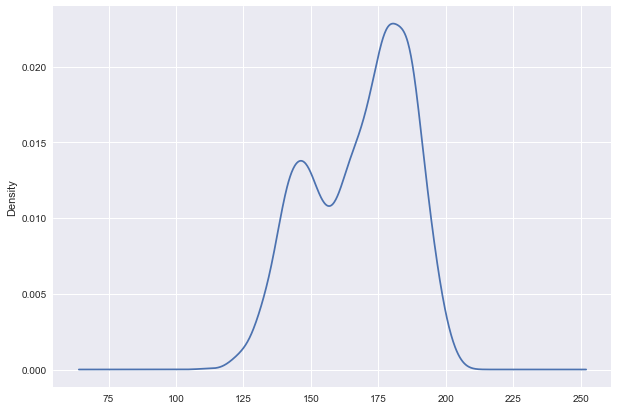

In [11]:
df_speed['Speed'].plot(kind='kde', figsize=(10, 7));

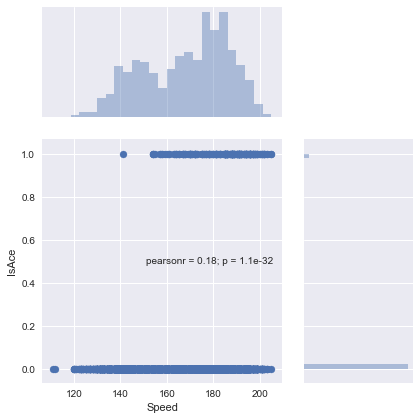

In [12]:
sns.jointplot("Speed", "IsAce", df_speed, kind='scatter', ratio=2)

In [13]:
from sklearn.neighbors import KernelDensity

In [14]:
k = KernelDensity(kernel='gaussian', bandwidth=0.75)

k.fit(df_speed['Speed'].values.reshape(-1, 1))

KernelDensity(algorithm='auto', atol=0, bandwidth=0.75, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

Now let's compare the sample distribution and the real serie

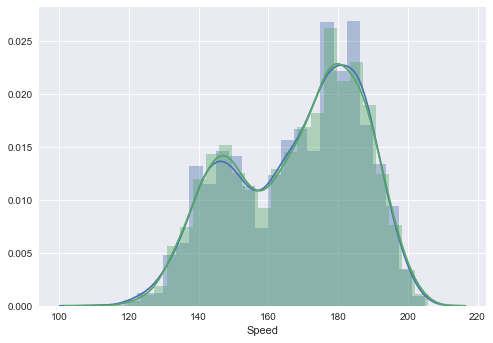

In [15]:
sampled = k.sample(df_speed.shape[0])

g = sns.distplot(df_speed['Speed'])
sns.distplot(sampled);

Let's now move to ace estimation; I will simply compute how likely it is that a certain service with a certain speed is going to be an Ace

In [16]:
ace_probs = df_speed.groupby('IsAce').size().div(len(df_speed))

ace_probs.head()

IsAce
0    0.958119
1    0.041881
dtype: float64

In [17]:
cond_prob = df_speed.groupby(['Speed', 'IsAce']).size().div(len(df_speed)).div(ace_probs, axis=0, level='IsAce');

cond_prob.sample(6)

Speed  IsAce
160.0  1        0.005348
196.0  1        0.053476
127.0  0        0.002104
157.0  0        0.008181
159.0  0        0.011921
200.0  1        0.010695
dtype: float64

Let's try to simulate 5 services using the estimated distribution and then compute how likely they are to be an ace

In [18]:
cond_prob = cond_prob.reset_index()

In [19]:
sampled = k.sample(3)

for service in sampled:
    service = int(service)
    print('Service speed: %d' % service)
    prob_ace = cond_prob[(cond_prob['Speed'] == service) & cond_prob['IsAce'] == 1]
    try:
        prob = prob_ace.values[0][2]
        print('Probability of being ace: %f' % prob)
        print('Probability of not being ace: %f' % (1-prob))
    except IndexError:
        print('Ace probability not sampled, average (speed +- 1)')

Service speed: 147
Ace probability not sampled, average (speed +- 1)
Service speed: 138
Ace probability not sampled, average (speed +- 1)
Service speed: 176
Probability of being ace: 0.010695
Probability of not being ace: 0.989305


One would also need to compute the conditional probability of a service being a foul given the speed of the service.

### Ability to respond

Work in progress